<a href="https://colab.research.google.com/github/MarcoCarnaghi-fi/UNS_Aprendizaje_Maquina_2021/blob/main/TP2/Ej2_Carnaghi_ROCCurves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clasificadores y Curva ROC

En el siguiente notebook analizamos dos conjuntos que buscamos discriminar mediante estudio estadístico y buscando el mejor valor de umbral mediante análisis de la curva ROC.

In [ ]:
# Usaremos las siguientes bibliotecas
# Datos
import numpy as np 
import pandas as pd 

# Viz
import seaborn as sns
import matplotlib.pyplot as plt

## Generación y Visualización de datos

In [ ]:
#Generacion de Datos

#Datos Clase A
np.random.seed(1)
features_number = 1
std_A = 10.0
mean_A = 0.0
df_A = pd.DataFrame(np.random.normal(scale=std_A, size=(50, features_number)) + mean_A, columns=['Values'])

std_B = 2.0
mean_B = 20
df_B = pd.DataFrame(np.random.normal(scale=std_B, size=(50, features_number)) + mean_B, columns=['Values'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


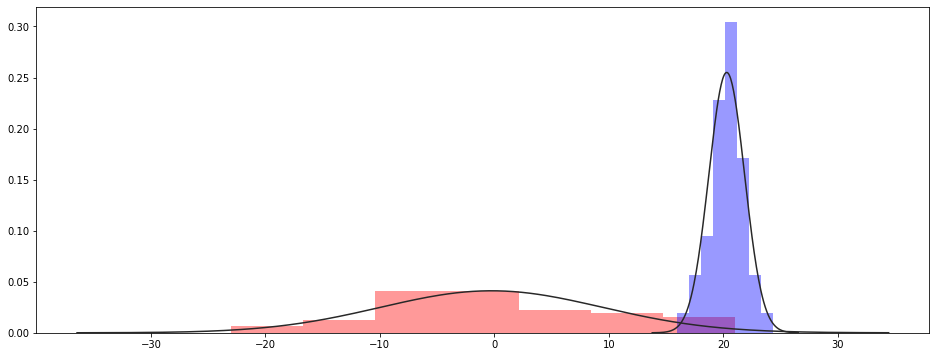

In [ ]:
#Veamos los datos generados
# Normal fitting for reference curve
from scipy.stats import norm

# Plot the distribution histogram 
plt.figure(figsize=(16,6))
ax = plt.subplot(1,1,1)
sns.distplot(df_A, fit=norm ,kde=False, ax=ax, color='r');
sns.distplot(df_B, fit=norm ,kde=False, ax=ax, color='b');

In [ ]:
#Combinando ambos DataFrame
df_A.insert(1,'Label',0)
df_B.insert(1,'Label',1)
df_tot = pd.concat([df_A,df_B])
df_tot

,Values,Label
0,16.243454,0
1,-6.117564,0
2,-5.281718,0
3,-10.729686,0
4,8.654076,0
...,...,...
45,20.154680,1
46,19.312293,1
47,20.087194,1
48,18.759998,1


In [ ]:
df_tot=df_tot.sort_values('Values')
df_tot

,Values,Label
5,-23.015387,0
11,-20.601407,0
36,-11.173103,0
20,-11.006192,0
15,-10.998913,0
...,...,...
16,22.263259,1
40,22.397836,1
11,22.505736,1
17,23.039634,1


## Generación de Curva ROC y mejor valor umbral

In [ ]:
#Generar ROC
df_tot.astype({'Label': 'int32'}).dtypes
thrs = df_tot['Values'].tolist()

res = []

for thr in thrs:
  df_tot['l_pred'] = ( df_tot['Values'] > thr)*1
  tp = len(df_tot[(df_tot['Label'] == 1 ) & (df_tot['l_pred']==1)])
  tn = len(df_tot[(df_tot['Label'] == 0 ) & (df_tot['l_pred']==0)])
  fp = len(df_tot[(df_tot['Label'] == 0 ) & (df_tot['l_pred']==1)])
  fn = len(df_tot[(df_tot['Label'] == 1 ) & (df_tot['l_pred']==0)])
  res.append((tp,tn,fp,fn,thr))


In [ ]:
df_cm = pd.DataFrame(res)
df_cm.columns = ['tp','tn','fp','fn','thr']

df_cm['tpr'] = df_cm['tp']/(df_cm['tp']+df_cm['fn'])
df_cm['fpr'] = df_cm['fp']/(df_cm['fp']+df_cm['tn'])

df_cm


,tp,tn,fp,fn,thr,tpr,fpr
0,50,1,49,0,-23.015387,1.00,0.98
1,50,2,48,0,-20.601407,1.00,0.96
2,50,3,47,0,-11.173103,1.00,0.94
3,50,4,46,0,-11.006192,1.00,0.92
4,50,5,45,0,-10.998913,1.00,0.90
...,...,...,...,...,...,...,...
95,4,50,0,46,22.263259,0.08,0.00
96,3,50,0,47,22.397836,0.06,0.00
97,2,50,0,48,22.505736,0.04,0.00
98,1,50,0,49,23.039634,0.02,0.00


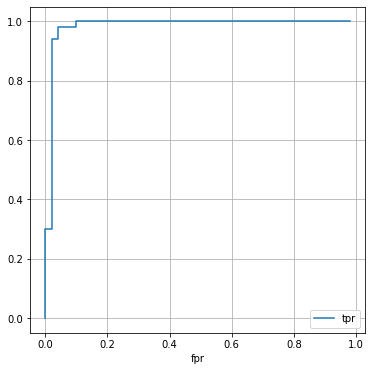

In [ ]:
df_cm.plot(x='fpr', y='tpr', grid=True, figsize=(6,6))

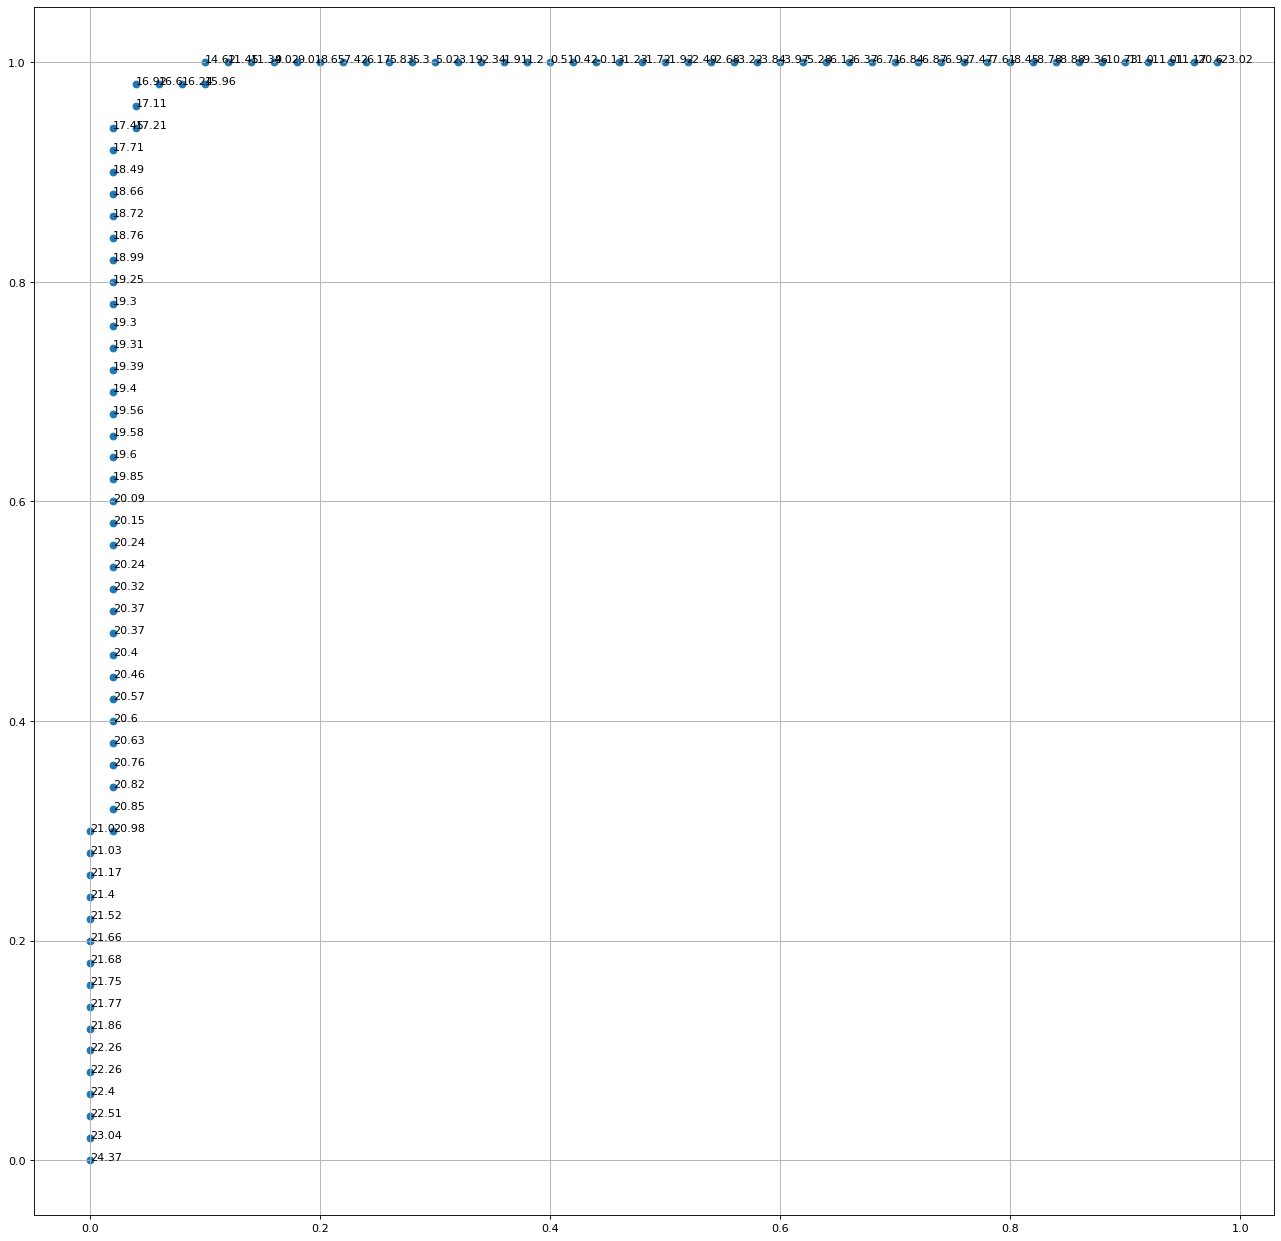

In [ ]:
plt.figure(figsize=(20,20), dpi=80)
plt.scatter(df_cm['fpr'], df_cm['tpr'])

for i, txt in enumerate(df_cm['thr']):
  plt.annotate(round(txt,2), (df_cm['fpr'][i],df_cm['tpr'][i]))


plt.grid()

Vemos que 16.9 es potencialmente un buen valor de umbral para este caso de clasificacion.

Una forma de buscar en forma automatica el mejor umbral, seria intentar maximizar los beneficios a la vez que buscamos minimizar los errores. Es decir, maximizar tpr y minimizar fpr. Lo cual podemos plantearlo como

maximize tpr - fpr

Que graficamente, en la curva ROC, seria equivalente a buscar el punto mas proximo al vertice superior izquierdo, que representa maxima tpr y fpr nula.

In [ ]:
#Generamos el campo de eleccion
df_cm['tpr-fpr'] = df_cm['tpr'] - df_cm['fpr']

#Ordenamos buscando el maximo valor
df_cm.sort_values('tpr-fpr', ascending=False)

,tp,tn,fp,fn,thr,tpr,fpr,tpr-fpr
48,49,48,2,1,16.924546,0.98,0.04,0.94
51,47,49,1,3,17.448118,0.94,0.02,0.92
49,48,48,2,2,17.111772,0.96,0.04,0.92
47,49,47,3,1,16.598022,0.98,0.06,0.92
44,50,45,5,0,14.621079,1.00,0.10,0.90
...,...,...,...,...,...,...,...,...
1,50,2,48,0,-20.601407,1.00,0.96,0.04
97,2,50,0,48,22.505736,0.04,0.00,0.04
0,50,1,49,0,-23.015387,1.00,0.98,0.02
98,1,50,0,49,23.039634,0.02,0.00,0.02


Con lo cual confirmamos la propuesta de que __16.9__ era el mejor valor de umbral para este clasificador.


## Modificaciones

Veamos ahora que ocurre ante los siguientes cambios:

* variar la std_B
* variar la mean_B
* variar ambas

### Variación de std_B

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


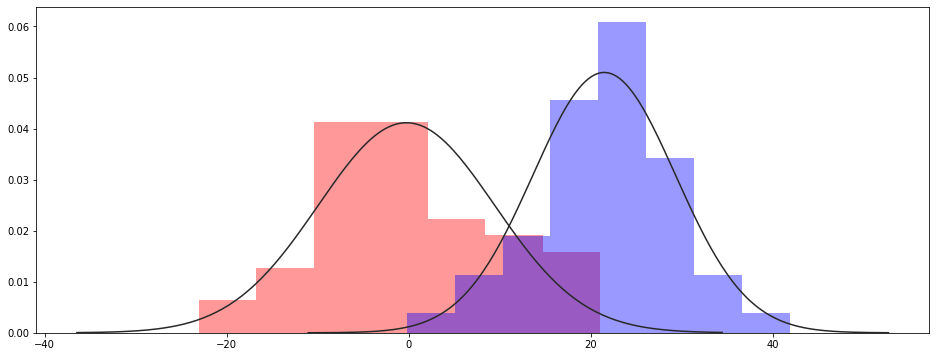

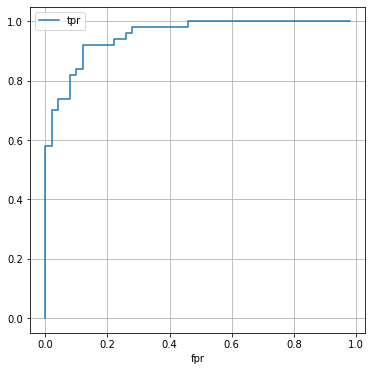

In [ ]:
# df_cm1 --> Variando  std_B
#Datos Clase A
np.random.seed(1)
features_number = 1
std_A = 10.0
mean_A = 0.0
df_A = pd.DataFrame(np.random.normal(scale=std_A, size=(50, features_number)) + mean_A, columns=['Values'])

std_B = 10.0
mean_B = 20
df_B = pd.DataFrame(np.random.normal(scale=std_B, size=(50, features_number)) + mean_B, columns=['Values'])

#Veamos los datos generados
# Normal fitting for reference curve
from scipy.stats import norm

# Plot the distribution histogram and highlight outliers in red
plt.figure(figsize=(16,6))
ax = plt.subplot(1,1,1)
sns.distplot(df_A, fit=norm ,kde=False, ax=ax, color='r');
sns.distplot(df_B, fit=norm ,kde=False, ax=ax, color='b');

#Combinando ambos DataFrame
df_A.insert(1,'Label',0)
df_B.insert(1,'Label',1)
df_tot = pd.concat([df_A,df_B])
df_tot=df_tot.sort_values('Values')

#Generar ROC
df_tot.astype({'Label': 'int32'}).dtypes
thrs = df_tot['Values'].tolist()

res = []

for thr in thrs:
  df_tot['l_pred'] = ( df_tot['Values'] > thr)*1
  tp = len(df_tot[(df_tot['Label'] == 1 ) & (df_tot['l_pred']==1)])
  tn = len(df_tot[(df_tot['Label'] == 0 ) & (df_tot['l_pred']==0)])
  fp = len(df_tot[(df_tot['Label'] == 0 ) & (df_tot['l_pred']==1)])
  fn = len(df_tot[(df_tot['Label'] == 1 ) & (df_tot['l_pred']==0)])
  res.append((tp,tn,fp,fn,thr))

df_cm_1 = pd.DataFrame(res)
df_cm_1.columns = ['tp','tn','fp','fn','thr']

df_cm_1['tpr'] = df_cm_1['tp']/(df_cm_1['tp']+df_cm_1['fn'])
df_cm_1['fpr'] = df_cm_1['fp']/(df_cm_1['fp']+df_cm_1['tn'])

df_cm_1.plot(x='fpr', y='tpr', grid=True, figsize=(6,6))

En este caso, al generar mayor similitud entre las distribuciones notamos que la performance del clasificador se deteriora levemente, debido a mayor solapamiento entre las dos distribuciones en el rango de valores intermedio entre ambas medias.

In [ ]:
#Generamos el campo de eleccion
df_cm_1['tpr-fpr'] = df_cm_1['tpr'] - df_cm_1['fpr']

#Ordenamos buscando el maximo valor
df_cm_1.sort_values('tpr-fpr', ascending=False)

,tp,tn,fp,fn,thr,tpr,fpr,tpr-fpr
47,46,44,6,4,11.447237,0.92,0.12,0.80
48,45,44,6,5,12.456021,0.90,0.12,0.78
46,46,43,7,4,11.337694,0.92,0.14,0.78
49,44,44,6,6,13.293377,0.88,0.12,0.76
45,46,42,8,4,9.015907,0.92,0.16,0.76
...,...,...,...,...,...,...,...,...
1,50,2,48,0,-20.601407,1.00,0.96,0.04
97,2,50,0,48,32.528682,0.04,0.00,0.04
0,50,1,49,0,-23.015387,1.00,0.98,0.02
98,1,50,0,49,35.198168,0.02,0.00,0.02


Acorde a lo dicho, vemos que el maximo valor de nuestra "funcion de costo" (tpr-fpr) es menor al caso anterior

### Variación de mean_B

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


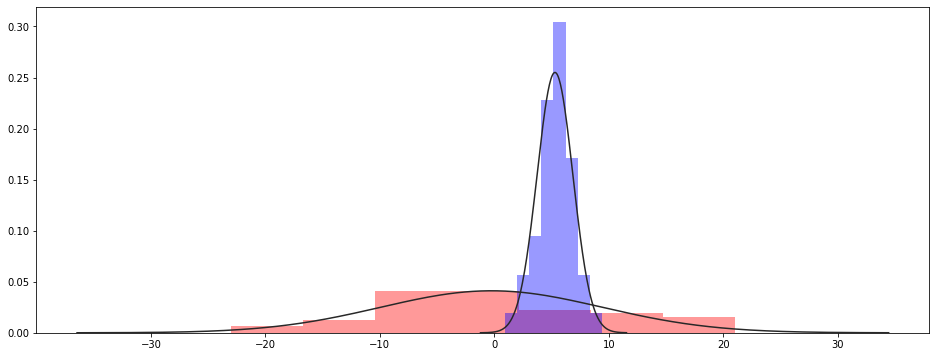

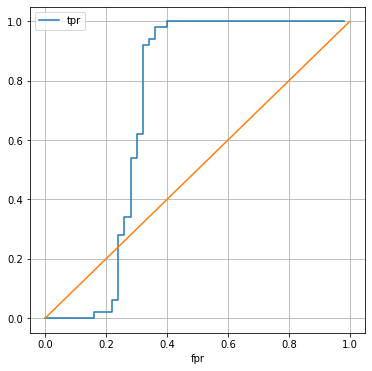

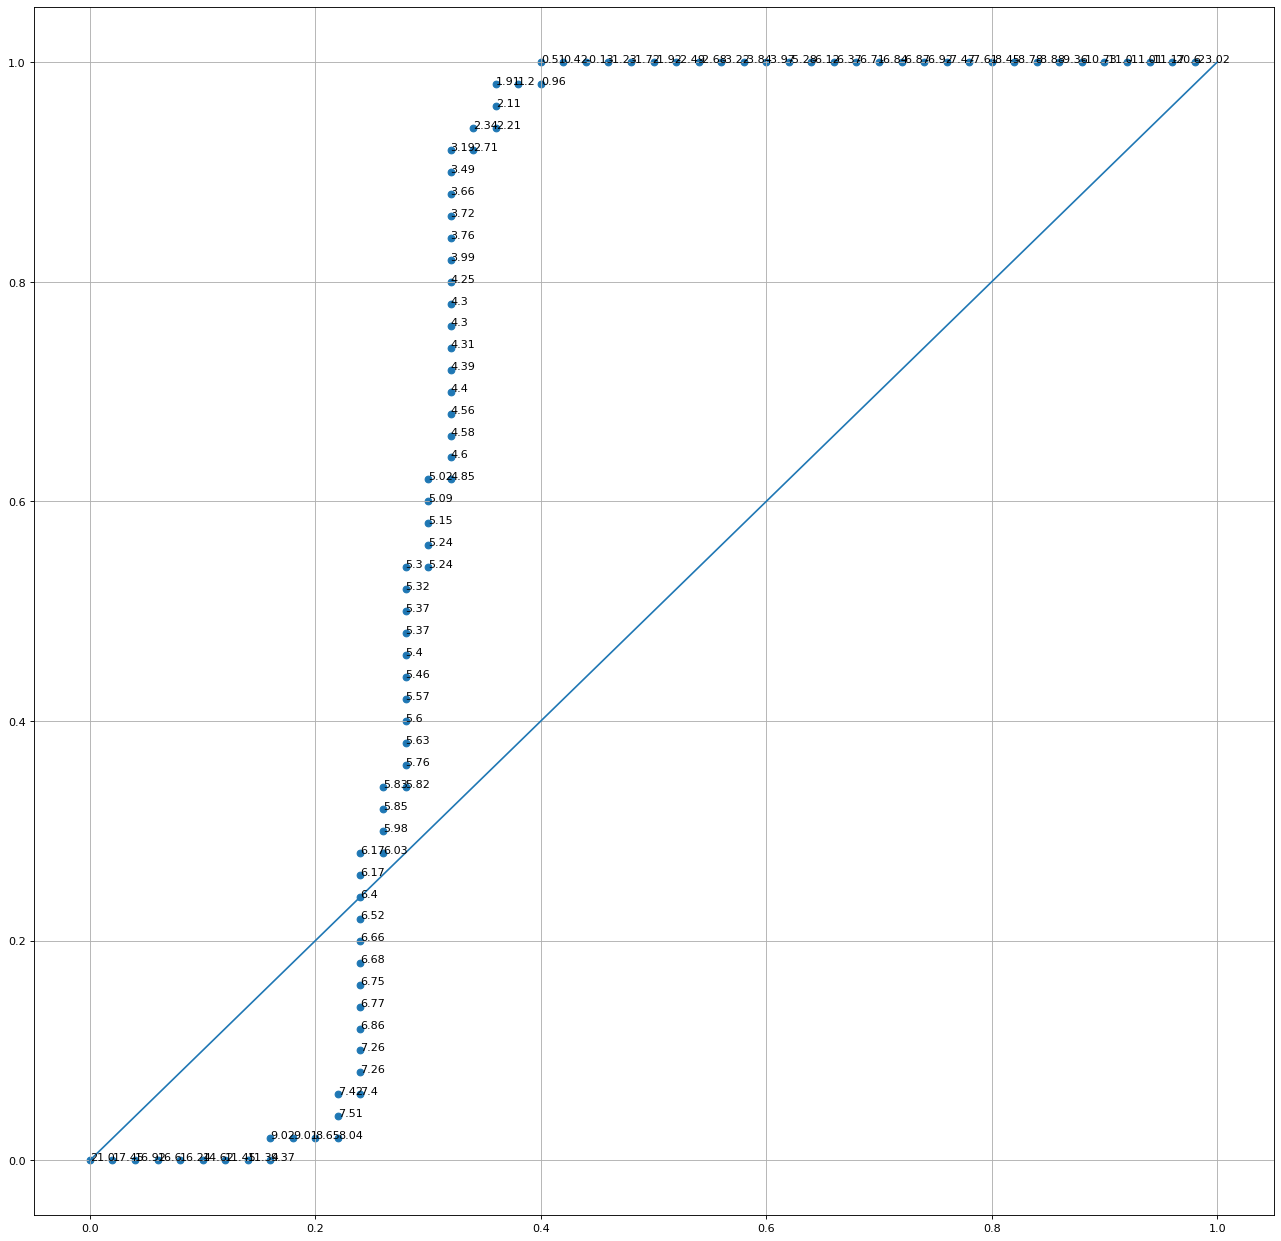

In [ ]:
# df_cm2 --> Variando  mean_B
#Datos Clase A
np.random.seed(1)
features_number = 1
std_A = 10.0
mean_A = 0.0
df_A = pd.DataFrame(np.random.normal(scale=std_A, size=(50, features_number)) + mean_A, columns=['Values'])

std_B = 2.0
mean_B = 5
df_B = pd.DataFrame(np.random.normal(scale=std_B, size=(50, features_number)) + mean_B, columns=['Values'])

#Veamos los datos generados
# Normal fitting for reference curve
from scipy.stats import norm

# Plot the distribution histogram and highlight outliers in red
plt.figure(figsize=(16,6))
ax = plt.subplot(1,1,1)
sns.distplot(df_A, fit=norm ,kde=False, ax=ax, color='r');
sns.distplot(df_B, fit=norm ,kde=False, ax=ax, color='b');

#Combinando ambos DataFrame
df_A.insert(1,'Label',0)
df_B.insert(1,'Label',1)
df_tot = pd.concat([df_A,df_B])
df_tot=df_tot.sort_values('Values')

#Generar ROC
df_tot.astype({'Label': 'int32'}).dtypes
thrs = df_tot['Values'].tolist()

res = []

for thr in thrs:
  df_tot['l_pred'] = ( df_tot['Values'] > thr)*1
  tp = len(df_tot[(df_tot['Label'] == 1 ) & (df_tot['l_pred']==1)])
  tn = len(df_tot[(df_tot['Label'] == 0 ) & (df_tot['l_pred']==0)])
  fp = len(df_tot[(df_tot['Label'] == 0 ) & (df_tot['l_pred']==1)])
  fn = len(df_tot[(df_tot['Label'] == 1 ) & (df_tot['l_pred']==0)])
  res.append((tp,tn,fp,fn,thr))

df_cm2 = pd.DataFrame(res)
df_cm2.columns = ['tp','tn','fp','fn','thr']

df_cm2['tpr'] = df_cm2['tp']/(df_cm2['tp']+df_cm2['fn'])
df_cm2['fpr'] = df_cm2['fp']/(df_cm2['fp']+df_cm2['tn'])


df_cm2.plot(x='fpr', y='tpr', grid=True, figsize=(6,6),)
plt.plot([0,1],[0 ,1])

plt.figure(figsize=(20,20), dpi=80)
plt.scatter(df_cm2['fpr'], df_cm2['tpr'])

for i, txt in enumerate(df_cm2['thr']):
  plt.annotate(round(txt,2), (df_cm2['fpr'][i],df_cm2['tpr'][i]))
plt.plot([0,1],[0 ,1])

plt.grid()

En este caso, vemos que hay un gran deterioro respecto de la recta de aleatoriedad (es decir, pendiente uno en el grafico tpr vs fpr) para los valores de umbral superiores a 6.4

Una forma seria invertir el la prediccion para valores en dicho rango.

Este comportamiento puede atribuirse al hecho de que la distribucion de la clase B se encuentra dentro del rango de la clase A, por lo que es en determinado rango, las probabilidades de pertenecer a una u otra son elevadas.





In [ ]:
#Generamos el campo de eleccion
df_cm2['tpr-fpr'] = df_cm2['tpr'] - df_cm2['fpr']

#Ordenamos buscando el maximo valor
df_cm2.sort_values('tpr-fpr', ascending=False)

,tp,tn,fp,fn,thr,tpr,fpr,tpr-fpr
32,49,32,18,1,1.909155,0.98,0.36,0.62
37,46,34,16,4,3.190391,0.92,0.32,0.60
31,49,31,19,1,1.201590,0.98,0.38,0.60
29,50,30,20,0,0.508078,1.00,0.40,0.60
33,48,32,18,2,2.111772,0.96,0.36,0.60
...,...,...,...,...,...,...,...,...
89,1,41,9,49,9.008559,0.02,0.18,-0.16
86,2,39,11,48,7.505736,0.04,0.22,-0.18
84,3,38,12,47,7.397836,0.06,0.24,-0.18
88,1,40,10,49,8.654076,0.02,0.20,-0.18


Nuevamente, la funcion de costo respalda las conclusiones obtenidas


### Variación combinada de std_B y mean_B

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


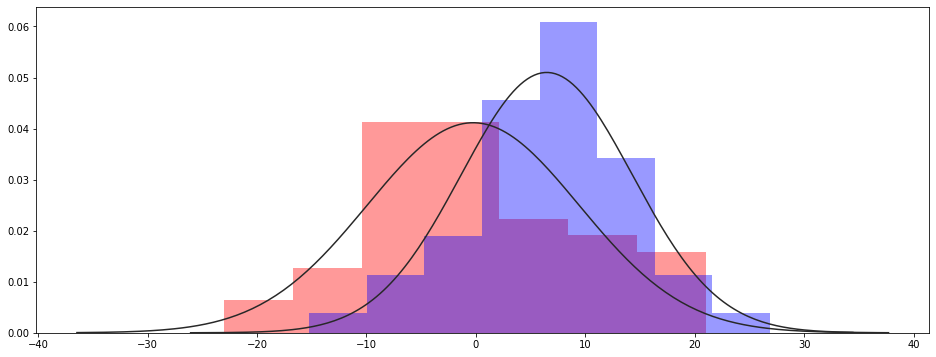

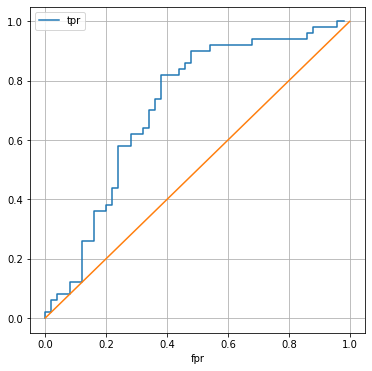

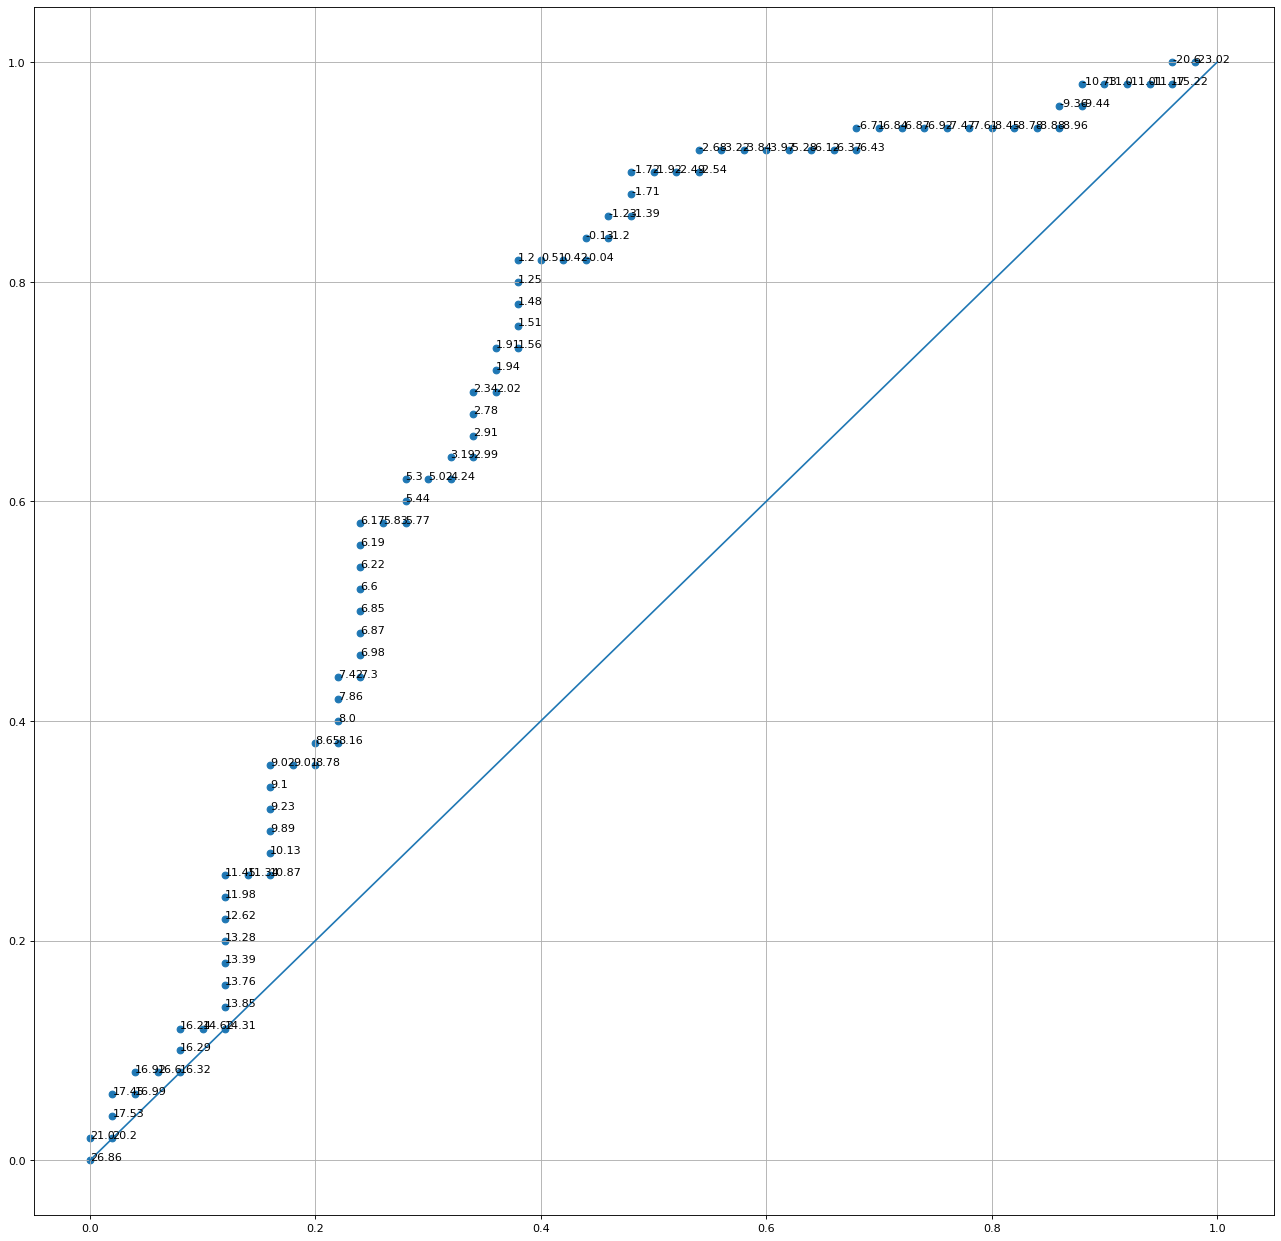

In [ ]:
# df_cm3 --> Variando  mean_B
#Datos Clase A
np.random.seed(1)
features_number = 1
std_A = 10.0
mean_A = 0.0
df_A = pd.DataFrame(np.random.normal(scale=std_A, size=(50, features_number)) + mean_A, columns=['Values'])

std_B = 10.0
mean_B = 5
df_B = pd.DataFrame(np.random.normal(scale=std_B, size=(50, features_number)) + mean_B, columns=['Values'])

#Veamos los datos generados
# Normal fitting for reference curve
from scipy.stats import norm

# Plot the distribution histogram and highlight outliers in red
plt.figure(figsize=(16,6))
ax = plt.subplot(1,1,1)
sns.distplot(df_A, fit=norm ,kde=False, ax=ax, color='r');
sns.distplot(df_B, fit=norm ,kde=False, ax=ax, color='b');

#Combinando ambos DataFrame
df_A.insert(1,'Label',0)
df_B.insert(1,'Label',1)
df_tot = pd.concat([df_A,df_B])
df_tot=df_tot.sort_values('Values')

#Generar ROC
df_tot.astype({'Label': 'int32'}).dtypes
thrs = df_tot['Values'].tolist()

res = []

for thr in thrs:
  df_tot['l_pred'] = ( df_tot['Values'] > thr)*1
  tp = len(df_tot[(df_tot['Label'] == 1 ) & (df_tot['l_pred']==1)])
  tn = len(df_tot[(df_tot['Label'] == 0 ) & (df_tot['l_pred']==0)])
  fp = len(df_tot[(df_tot['Label'] == 0 ) & (df_tot['l_pred']==1)])
  fn = len(df_tot[(df_tot['Label'] == 1 ) & (df_tot['l_pred']==0)])
  res.append((tp,tn,fp,fn,thr))

df_cm3 = pd.DataFrame(res)
df_cm3.columns = ['tp','tn','fp','fn','thr']

df_cm3['tpr'] = df_cm3['tp']/(df_cm3['tp']+df_cm3['fn'])
df_cm3['fpr'] = df_cm3['fp']/(df_cm3['fp']+df_cm3['tn'])


df_cm3.plot(x='fpr', y='tpr', grid=True, figsize=(6,6),)
plt.plot([0,1],[0 ,1])

plt.figure(figsize=(20,20), dpi=80)
plt.scatter(df_cm3['fpr'], df_cm3['tpr'])

for i, txt in enumerate(df_cm3['thr']):
  plt.annotate(round(txt,2), (df_cm3['fpr'][i],df_cm3['tpr'][i]))
plt.plot([0,1],[0 ,1])

plt.grid()

En este caso, observamos que el hecho de tener una mayor desviacion en la distribucion de la clase B, nos facilita la distincion entre una clase y la otra. Ya que tienen desviaciones similares pero distintas medias. Sin embargo, la performance del clasificador sigue siendo inferior al primer caso de estudio. Veamos qué indica la función de costo propuesta...


In [ ]:
#Generamos el campo de eleccion
df_cm3['tpr-fpr'] = df_cm3['tpr'] - df_cm3['fpr']

#Ordenamos buscando el maximo valor
df_cm3.sort_values('tpr-fpr', ascending=False)

,tp,tn,fp,fn,thr,tpr,fpr,tpr-fpr
39,41,31,19,9,1.201590,0.82,0.38,0.44
30,45,26,24,5,-1.724282,0.90,0.48,0.42
40,40,31,19,10,1.247150,0.80,0.38,0.42
38,41,30,20,9,0.508078,0.82,0.40,0.42
41,39,31,19,11,1.477502,0.78,0.38,0.40
...,...,...,...,...,...,...,...,...
88,6,45,5,44,14.621079,0.12,0.10,0.02
87,6,44,6,44,14.311021,0.12,0.12,0.00
91,4,46,4,46,16.316294,0.08,0.08,0.00
97,1,49,1,49,20.198168,0.02,0.02,0.00


Observando este resultado, llevamos a la conclusión de que este es el caso con la performance más pobre. Aunque a priori si se pensaba superior al caso df_cm2.
El potencial factor clave es el elevado solapamiento de ambas distribuciones.